Introduction to PyTorch

Welcome to our PyTorch tutorial!

In [96]:
## Standard libraries
import os
import math
import numpy as np 
import time

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

## Progress bar
from tqdm.notebook import tqdm

## The Basics of PyTorch


In [112]:
import torch
print("Using torch", torch.__version__)

Using torch 1.11.0


### Tensors

张量相当于 PyTorch 的 Numpy 数组。
`张量`这个名字是对你已经知道的概念的概括。例如，向量是一维张量，矩阵是二维张量。在使用神经网络时，我们将使用各种形状和维数的张量。

在 numpy 中知道的大多数常用函数也可以用于张量。实际上，由于 numpy 数组与张量非常相似，我们可以将大多数张量转换为 numpy 数组（然后再转换回来），但我们并不经常需要这样做。

#### Initialization

让我们先来看看创建张量的不同方法。有许多可能的选择，最简单的是调用 `torch.Tensor` 并将所需的形状作为输入参数：

In [114]:
x = torch.Tensor(2, 3, 4)
print(x)
x[0, 1, 1] = 100
print(x)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])
tensor([[[  0.,   0.,   0.,   0.],
         [  0., 100.,   0.,   0.],
         [  0.,   0.,   0.,   0.]],

        [[  0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.]]])


函数 `torch.Tensor` 会为所需的张量分配内存，但会重复使用内存中已存在的任何值。要在初始化过程中直接为张量赋值，有许多替代方法，包括

* `torch.zeros`： 创建一个充满零的张量
* `torch.ones`： 创建一个充满 1 的张量
* `torch.rand`： 创建一个张量，随机值在 0 和 1 之间均匀采样
* `torch.randn`： 创建一个张量，包含从均值为 0、方差为 1 的正态分布中采样的随机值
* `torch.arange`： 创建一个张量，包含 $N,N+1,N+2,...,M$。
* `torch.Tensor` （输入列表）： 根据您提供的列表元素创建张量

In [120]:
# Create a tensor from a list
x = torch.Tensor([[1, 2], [3, 4]])


In [122]:
# Create a tensor with random values between 0 and 1 with the shape [2, 3, 4]
x = torch.rand(2, 3, 4)
print(x)

tensor([[[0.4680, 0.6948, 0.2807, 0.1236],
         [0.5896, 0.0905, 0.3542, 0.2404],
         [0.6786, 0.3545, 0.0904, 0.2602]],

        [[0.2665, 0.5397, 0.4223, 0.1245],
         [0.9937, 0.9351, 0.9908, 0.1950],
         [0.7799, 0.7190, 0.4023, 0.2289]]])


您可以使用与 numpy (`x.shape`)相同的方法或使用`.size`方法获取张量的形状：

In [123]:
shape = x.shape
print("Shape:", x.shape)

size = x.size()
print("Size:", size)

dim1, dim2, dim3 = x.size()
print("Size:", dim1, dim2, dim3)


# torch.Tensor(3).shape

Shape: torch.Size([2, 3, 4])
Size: torch.Size([2, 3, 4])
Size: 2 3 4


#### Tensor to Numpy, and Numpy to Tensor

张量可以转换成 numpy 数组，而 numpy 数组又可以转换成张量。要将 numpy 数组转换为张量，我们可以使用函数 `torch.from_numpy`：

In [8]:
np_arr = np.array([[1, 2], [3, 4]])
tensor = torch.from_numpy(np_arr)

print("Numpy array:", np_arr)
print("PyTorch tensor:", tensor)

Numpy array: [[1 2]
 [3 4]]
PyTorch tensor: tensor([[1, 2],
        [3, 4]])


要将 PyTorch 张量转换回 numpy 数组，我们可以在张量上使用函数 `.numpy()`：

In [9]:
tensor = torch.arange(4)
np_arr = tensor.numpy()

print("PyTorch tensor:", tensor)
print("Numpy array:", np_arr)

PyTorch tensor: tensor([0, 1, 2, 3])
Numpy array: [0 1 2 3]


将张量转换为 numpy 需要张量位于 CPU 上，而不是 GPU 上（关于 GPU 支持的更多信息将在后文介绍）。如果张量在 GPU 上，则需要事先在张量上调用 `.cpu()`。因此，你会看到类似 `np_arr = tensor.cpu().numpy()`这样的一行。

#### Operations

numpy 中的大多数操作在 PyTorch 中也同样存在。完整的操作列表可以在 [PyTorch 文档](https://pytorch.org/docs/stable/tensors.html#) 中找到，但我们将在这里回顾一下最重要的操作。

最简单的操作是将两个张量相加：

In [2]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

X1 tensor([[0.7154, 0.9339, 0.0167],
        [0.8170, 0.2917, 0.1998]])
X2 tensor([[0.3390, 0.9764, 0.9415],
        [0.9689, 0.0170, 0.1783]])
Y tensor([[1.0544, 1.9103, 0.9581],
        [1.7859, 0.3087, 0.3781]])


调用 `x1 + x2` 会创建一个新的张量，其中包含两个输入的总和。不过，我们也可以使用直接应用于张量内存的就地操作。因此，我们可以改变 `x2` 的值，而无需重新访问操作前的 `x2` 值。下面是一个例子：

In [11]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
print("X1 (before)", x1)
print("X2 (before)", x2)

x2.add_(x1)
print("X1 (after)", x1)
print("X2 (after)", x2)

X1 (before) tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])
X2 (before) tensor([[0.7104, 0.9464, 0.7890],
        [0.2814, 0.7886, 0.5895]])
X1 (after) tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])
X2 (after) tensor([[1.2884, 1.8504, 1.3437],
        [0.6237, 1.4230, 0.9539]])


就地(in-place)操作通常用下划线后缀来标记（例如，用 `add_`代替 `add`）。

另一种常见的操作是改变张量的形状。大小为 (2,3) 的张量可以被重新组织成元素数量相同的任何其他形状（例如，大小为 (6) 或 (3,2) 的张量......）。在 PyTorch 中，这种操作被称为 `view`：

In [12]:
x = torch.arange(6)
print("X", x)

X tensor([0, 1, 2, 3, 4, 5])


In [13]:
x = x.view(2, 3)
x.reshape
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [5]:
# x = x.permute(1, 0) # Swapping dimension 0 and 1
# print("X", x)

# x = torch.randn(3, 4)
# x.T
# x.tranpose(0, 1)
import torch
x = torch.randn(2, 3, 4)
print(x)
print(x.transpose(-1,-2))
print(x[0])
print(x.transpose(1, 2)[0])

tensor([[[-1.3202, -1.1246, -2.4742,  0.5762],
         [ 0.4319,  0.9564, -0.5912,  1.4288],
         [ 1.4992,  0.4803, -1.3889, -0.0223]],

        [[ 0.6575,  0.5434, -2.3866,  1.0087],
         [ 0.7665, -0.3137,  1.6642, -1.3275],
         [-1.0909, -0.9719,  0.5329,  1.5151]]])
tensor([[[-1.3202,  0.4319,  1.4992],
         [-1.1246,  0.9564,  0.4803],
         [-2.4742, -0.5912, -1.3889],
         [ 0.5762,  1.4288, -0.0223]],

        [[ 0.6575,  0.7665, -1.0909],
         [ 0.5434, -0.3137, -0.9719],
         [-2.3866,  1.6642,  0.5329],
         [ 1.0087, -1.3275,  1.5151]]])
tensor([[-1.3202, -1.1246, -2.4742,  0.5762],
        [ 0.4319,  0.9564, -0.5912,  1.4288],
        [ 1.4992,  0.4803, -1.3889, -0.0223]])
tensor([[-1.3202,  0.4319,  1.4992],
        [-1.1246,  0.9564,  0.4803],
        [-2.4742, -0.5912, -1.3889],
        [ 0.5762,  1.4288, -0.0223]])


其他常用操作包括矩阵乘法，这对神经网络至关重要。通常，我们有一个输入向量 $\mathbf{x}$，使用学习到的权重矩阵 $\mathbf{W}$ 对其进行转换。执行矩阵乘法有多种方法和函数，下面列出其中一些：

* `torch.matmul`： 在两个张量上执行矩阵乘积，具体行为取决于维数。如果两个输入都是矩阵（二维张量），则执行标准矩阵乘积。对于更高维的输入，函数支持广播。也可以写成 `a @ b`，类似于 numpy。
* `torch.mm`： 在两个矩阵上执行矩阵乘积，但不支持广播
* `torch.bmm`： 执行支持批量维度的矩阵乘积。如果第一个张量 $T$ 的形状是 ($b\times n\times m$)，第二个张量 $R$ 的形状是 ($b\times m\times p$)，那么输出 $O$ 的形状是 ($b\times n\times p$)，并且是通过对 $T$ 和 $R$ 的子矩阵进行 $b$ 矩阵乘法计算出来的： $O_i = T_i @ R_i$

通常，我们使用 `torch.matmul` 或 `torch.bmm`。我们可以试试下面的`torch.matmul`矩阵乘法。

In [126]:
x = torch.arange(6)
x = x.view(2, 3)
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [127]:
W = torch.arange(9).view(3, 3) # We can also stack multiple operations in a single line
print("W", W)

W tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [128]:
h = torch.matmul(x, W) # Verify the result by calculating it by hand too!
print("h", h)

bx1 = [x, x, x]
by1 = [W, W, W]

torch.bmm(bx1, by1)

for i, j in zip(bx1, by1):
    torch.matmul(i, j)

h tensor([[15, 18, 21],
        [42, 54, 66]])


In [129]:
# 广播 broadcasting


x = torch.zeros(4, 3)
y = torch.ones(1, 3)
print("x+y:", x+y)

x+y: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


矩阵乘：AB

hadamard积：A$\cdot$B

In [131]:
# element-wise 操作
x = torch.ones(4, 3) * 0.1
y = torch.zeros(3, 4)
z = torch.arange(12).view(4, 3)
x * z
x ** 2

tensor([[0.0100, 0.0100, 0.0100],
        [0.0100, 0.0100, 0.0100],
        [0.0100, 0.0100, 0.0100],
        [0.0100, 0.0100, 0.0100]])

#### Indexing

我们经常会遇到需要从张量中选择一部分的情况。索引的工作原理与 numpy 中的一样:

In [132]:
x = torch.arange(12).view(3, 4)
print("X", x)

X tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [19]:
print(x[:, 1])   # Second column

tensor([1, 5, 9])


In [20]:
print(x[0])      # First row

tensor([0, 1, 2, 3])


In [21]:
print(x[:2, -1]) # First two rows, last column
print(x[[1,5], [2,10]]) # First two rows, last column

tensor([3, 7])


In [9]:
print(x[1:3, :]) # Middle two rows

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [133]:
col = torch.tensor([1, 2, 0]).view(-1, 1)
torch.gather(x, index=col, dim=-1)

tensor([[1],
        [6],
        [8]])

####  给定向量组 [$a_0$,..., $a_{n-1}$], [$b_0$, ..., $b_{n-1}$], 求 [$a_i \cdot b_i$]

- 向量/矩阵计算 ✅

- 大量 for 循环 ❌

In [142]:
n = 10000
a = [torch.randn(n) for _ in range(n)]
b = [torch.randn(n) for _ in range(n)]

import time

# method 0
# start = time.time()
# results = []
# for va, vb in zip(a, b):
#     temp_result = []
#     for vai, vbi in zip(va, vb):
#         temp_result.append(vai * vbi)
#     results.append(sum(temp_result))
    
# print()
# print("time:", time.time() - start)
# print("results in method0:\n", torch.stack(results))

In [139]:
# method 1
start = time.time()
results = [
    sum([
        vai * vbi 
        for vai, vbi in zip(va, vb)
    ])
    for va, vb in zip(a, b)
]
print()
print("time:", time.time() - start)
print("results in method1:", torch.Tensor(results))


time: 4.753100872039795
results in method1: tensor([-5.8982e+00, -3.2186e+01, -1.5029e+01, -2.5476e+01,  2.8028e+01,
        -3.2163e+01,  5.9297e+01, -2.6001e+01, -1.2588e+01, -7.9448e+01,
         4.0320e+01,  5.8210e+01,  8.9521e+00, -7.5229e+00,  3.0249e+01,
        -1.6314e+01,  3.7706e+01, -4.9297e+00, -1.6007e+01, -3.7929e+01,
        -3.7195e+00, -2.7304e+01,  1.1427e+01,  2.1057e+01, -7.1508e+01,
         7.1505e+00,  1.4369e+01, -1.2061e+01,  9.5249e+00, -9.2616e+00,
         1.2018e+01,  1.9793e+01, -2.1272e+01,  1.7022e+00,  1.3184e+00,
         3.7762e+01,  1.2049e+01, -3.9790e+01,  8.4655e+00,  1.0135e+01,
        -1.5376e+01, -6.1019e+00, -2.0918e+01,  1.7664e+01,  1.4487e+01,
        -6.7330e+01, -2.6555e+01, -5.5206e+00,  5.1327e+01, -1.9685e+01,
        -3.4245e+01,  4.7856e+01,  5.3373e+01, -9.7687e+00,  3.9315e+01,
        -3.9470e+01,  2.4436e+00,  4.1400e+01, -2.0411e+01, -8.3499e+00,
         2.7640e+01,  2.6016e+01, -5.3660e+01, -1.2437e+01,  9.4923e+00,
      

In [143]:
# method 2
start = time.time()
results = [(va * vb).sum() for va, vb in zip(a, b)]
print()
print("time:", time.time() - start)
print("results in method2:", results)



time: 0.39998626708984375
results in method2: [tensor(-65.0583), tensor(59.1920), tensor(40.4761), tensor(-18.0643), tensor(-119.7118), tensor(-13.3671), tensor(-83.3450), tensor(34.2380), tensor(71.1563), tensor(-104.5384), tensor(-60.1782), tensor(21.4946), tensor(-91.1711), tensor(4.6029), tensor(130.5476), tensor(33.4596), tensor(16.4574), tensor(106.9127), tensor(3.5484), tensor(-5.4953), tensor(95.9654), tensor(60.4910), tensor(79.0155), tensor(104.8964), tensor(26.1313), tensor(-80.9471), tensor(56.2119), tensor(187.4629), tensor(-120.5252), tensor(35.2222), tensor(108.8353), tensor(40.1774), tensor(60.7239), tensor(71.3425), tensor(-124.2861), tensor(-39.5960), tensor(5.5379), tensor(-11.7094), tensor(-272.2716), tensor(109.8419), tensor(118.1114), tensor(30.4715), tensor(89.1912), tensor(57.2053), tensor(1.3032), tensor(106.0190), tensor(-26.6525), tensor(40.6155), tensor(-98.4466), tensor(44.3723), tensor(-162.9915), tensor(-91.7540), tensor(193.7707), tensor(146.1479), tens

In [145]:
# method 3
start = time.time()
_a = torch.stack(a)
_b = torch.stack(b)
middle = time.time()
results = (_a * _b).sum(1)
print()
print("time:", time.time() - middle)
print("time stack:", middle - start)
print("results in method3:", results)


time: 0.08602404594421387
time stack: 0.2662990093231201
results in method3: tensor([-65.0583,  59.1920,  40.4761,  ...,  49.3632, -86.2690, -21.5652])


#### 向量/矩阵的拼接

不同维度的拼接

列拼接 (dim=1)：
<table>
  <tr>
    <td>A</td>
    <td>B</td>
  </tr>
</table>


行拼接 (dim=0):

| A |
|---|
| B |


In [147]:
a = torch.zeros(3, 2)
b = torch.ones(3, 4)
c = torch.ones(2, 2)

# print("[a, b] = \n", torch.cat([a, b], dim=1))
print("[a]\n[c] = \n", torch.cat([a, c], dim=0))

[a]
[c] = 
 tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [1., 1.],
        [1., 1.]])


#### batch
批处理的概念

In [36]:
d = 20
n = 1000

x = torch.randn(1000, d)
weight = torch.randn(d, d)

# method 1
results = torch.matmul(x, weight)

# method 2
results = []
for i in range(len(x)):
    item = x[i].view(1, -1)
    results.append(torch.matmul(item, weight))

# method 2
batch_size = 100
results = []
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    results.append(torch.matmul(x_batch, weight))
results = torch.cat(results)

In [ ]:
a = torch.randn(4)
b = torch.randn(4)

absum = (a * b).sum()
a_norm = (a ** 2).sum().sqrt()
a_norm = torch.norm(a, p=2)

absum / a_norm / b_norm

### GPU support

In [148]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Is the GPU available? False


In [149]:
x = torch.randn(3, 2)
print(x.device)

cpu


In [30]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cuda


In [31]:
x = torch.zeros(2, 3)
x = x.to(device)
print("X", x)

X tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


In [32]:
x = torch.randn(5000, 5000)

## CPU version
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

## GPU version
x = x.to(device)
_ = torch.matmul(x, x)  # First operation to 'burn in' GPU
# CUDA is asynchronous, so we need to use different timing functions
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)
start.record()
_ = torch.matmul(x, x)
end.record()
torch.cuda.synchronize()  # Waits for everything to finish running on the GPU
print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")  # Milliseconds to seconds

CPU time: 0.20694s
GPU time: 0.00985s


## Learning by example: Continuous XOR

如果我们想在 PyTorch 中构建一个神经网络，我们可以使用 `Tensors`（使用 `requires_grad=True` 时）指定所有参数（权重矩阵、偏置向量），让 PyTorch 计算梯度，然后调整参数。但如果我们有很多参数，事情很快就会变得繁琐。在 PyTorch 中，有一个名为 `torch.nn` 的软件包可以让神经网络的构建更加方便。

我们将介绍在 PyTorch 中训练神经网络可能需要的库和所有其他部分，使用一个简单但众所周知的示例分类器： XOR。给定两个二进制输入 $x_1$ 和 $x_2$，如果 $x_1$ 或 $x_2$ 中的一个是 $1$，而另一个是 $0$，那么要预测的标签就是 $1$，或者在所有其他情况下标签都是 $0$。这个例子之所以出名，是因为单个神经元（即线性分类器）无法学习这个简单的函数。
因此，我们将学习如何构建一个可以学习这个函数的小型神经网络。
为了增加趣味性，我们将 XOR 移入连续空间，并在二进制输入上引入一些高斯噪声。我们想要的 XOR 数据集分离情况如下：

### The model

`torch.nn`包定义了一系列有用的类，如线性网络层、激活函数、损失函数等。完整列表可在 [此处](https://pytorch.org/docs/stable/nn.html) 找到。如果您需要某个网络层，请在自己编写该层之前先查看软件包的文档，因为该软件包很可能已经包含了相关代码。我们将在下文中导入：

In [85]:
import torch.nn as nn

除了 `torch.nn`，还有 `torch.nn.functional`。它包含在网络层中使用的函数。这与 `torch.nn` 不同，后者将它们定义为 `nn.Modules`（下文将详细介绍），而且 `torch.nn` 实际上使用了 `torch.nn.functional` 中的许多功能。因此，功能包在很多情况下都很有用，所以我们在这里也要导入它。

In [86]:
import torch.nn.functional as F

#### nn.Module

在 PyTorch 中，神经网络是由模块组成的。模块可以包含其他模块，神经网络本身也是一个模块。模块的基本模板如下：

In [87]:
class MyModule(nn.Module):
    
    def __init__(self):
        super().__init__()
        # Some init for my module
        
    def forward(self, x):
        # Function for performing the calculation of the module.
        pass

前向函数`forward`是进行模块计算的地方，在调用模块时执行（`nn = MyModule(); nn(x)`）。在 init 函数中，我们通常使用 `nn.Parameter` 创建模块参数，或定义在正向函数中使用的其他模块。逆向计算是自动完成的，但如果需要，也可以覆盖。

#### Simple classifier
现在，我们可以利用 `torch.nn` 软件包中的预定义模块，定义自己的小型神经网络。我们将使用包含一个输入层、一个以`tanh`作为激活函数的隐藏层和一个输出层的最小网络。换句话说，我们的网络应该是这样的：

在 PyTorch 中，我们可以将其定义如下：

In [88]:
class SimpleClassifier(nn.Module):

    def __init__(self, num_inputs=2, num_hidden=4, num_outputs=1):
        super().__init__()
        # Initialize the modules we need to build the network
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x

在示例中，我们将使用一个具有两个输入神经元和四个隐藏神经元的微型神经网络。在进行二元分类时，我们将使用单个输出神经元。请注意，我们还没有对输出应用 sigmoid 函数。这是因为其他函数，尤其是损失函数，在原始输出上进行计算比在 sigmoid 输出上进行计算更有效、更精确。详细原因我们稍后再讨论。

In [89]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
# Printing a module shows all its submodules
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


Printing the model lists all submodules it contains. The parameters of a module can be obtained by using its `parameters()` functions, or `named_parameters()` to get a name to each parameter object. For our small neural network, we have the following parameters:

In [90]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter linear1.weight, shape torch.Size([4, 2])
Parameter linear1.bias, shape torch.Size([4])
Parameter linear2.weight, shape torch.Size([1, 4])
Parameter linear2.bias, shape torch.Size([1])


每个线性层都有一个形状为"[输出，输入]"的权重矩阵和一个形状为"[输出]"的偏置。tanh 激活函数没有任何参数。请注意，只有直接作为对象属性的 `nn.Module` 对象才会注册参数，即 `self.a = ...`。如果您定义了一个模块列表，这些模块的参数不会被外部模块注册，这可能会在您尝试优化模块时造成一些问题。有一些替代方法，如 `nn.ModuleList`、`nn.ModuleDict` 和 `nn.Sequential`，可以让你拥有不同的模块数据结构。我们将在稍后的教程中使用它们并加以说明。

### The data

PyTorch also provides a few functionalities to load the training and test data efficiently, summarized in the package `torch.utils.data`.

In [91]:
import torch.utils.data as data

The data package defines two classes which are the standard interface for handling data in PyTorch: `data.Dataset`, and `data.DataLoader`. The dataset class provides an uniform interface to access the training/test data, while the data loader makes sure to efficiently load and stack the data points from the dataset into batches during training.

#### The dataset class

The dataset class summarizes the basic functionality of a dataset in a natural way. To define a dataset in PyTorch, we simply specify two functions: `__getitem__`, and `__len__`. The get-item function has to return the $i$-th data point in the dataset, while the len function returns the size of the dataset. For the XOR dataset, we can define the dataset class as follows:

In [92]:
class XORDataset(data.Dataset):

    def __init__(self, size, std=0.1):
        """
        Inputs:
            size - Number of data points we want to generate
            std - Standard deviation of the noise (see generate_continuous_xor function)
        """
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()

    def generate_continuous_xor(self):
        # Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
        # The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
        # If x=y, the label is 0.
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.long)
        # To make it slightly more challenging, we add a bit of gaussian noise to the data points.
        data += self.std * torch.randn(data.shape)

        self.data = data
        self.label = label

    def __len__(self):
        # Number of data point we have. Alternatively self.data.shape[0], or self.label.shape[0]
        return self.size

    def __getitem__(self, idx):
        # Return the idx-th data point of the dataset
        # If we have multiple things to return (data point and label), we can return them as tuple
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

Let's try to create such a dataset and inspect it:

In [93]:
dataset = XORDataset(size=200)
print("Size of dataset:", len(dataset))
print("Data point 0:", dataset[0])

Size of dataset: 200
Data point 0: (tensor([-0.0415, -0.1158]), tensor(0))


To better relate to the dataset, we visualize the samples below. 

In [94]:
def visualize_samples(data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]
    
    plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

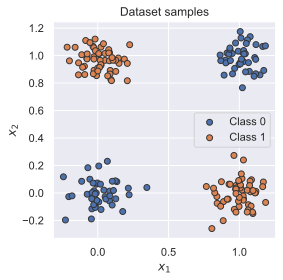

In [97]:
visualize_samples(dataset.data, dataset.label)
plt.show()

#### The data loader class

类 `torch.utils.data.DataLoader`代表了数据集上的 Python 可迭代器，支持自动批处理、多进程数据加载和更多特性。数据加载器使用函数 `__getitem__`与数据集通信，并将其输出堆叠为第一维度上的张量，形成批处理。
与数据集类相比，我们通常不必定义自己的数据加载器类，而只需将数据集作为输入创建一个数据加载器对象即可。此外，我们还可以使用以下输入参数配置数据加载器

* `batch_size`： 每批要堆叠的样本数
* `shuffle`： 如果为 True，数据将以随机顺序返回。这在引入随机性的训练中非常重要。

下面让我们创建一个简单的数据加载器：

In [98]:
data_loader = data.DataLoader(dataset, batch_size=8, shuffle=True)

In [99]:
# next(iter(...)) catches the first batch of the data loader
# If shuffle is True, this will return a different batch every time we run this cell
# For iterating over the whole dataset, we can simple use "for batch in data_loader: ..."
data_inputs, data_labels = next(iter(data_loader))

# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the 
# dimensions of the data point returned from the dataset class
print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs torch.Size([8, 2]) 
 tensor([[ 1.0054e+00,  5.0986e-02],
        [-1.3546e-01,  9.4709e-01],
        [-3.3083e-02,  1.0670e+00],
        [ 3.4680e-05,  9.0961e-01],
        [ 1.0216e+00,  7.6584e-01],
        [-2.6473e-02,  1.6056e-02],
        [ 2.2563e-01,  1.0789e+00],
        [ 1.0070e+00,  9.3947e-01]])
Data labels torch.Size([8]) 
 tensor([1, 1, 1, 1, 0, 0, 1, 0])


### Optimization

在定义模型和数据集之后，就该准备优化模型了。在训练过程中，我们将执行以下步骤：

1. 从数据加载器中获取一批数据
2. 从模型中获取该批次的预测结果
3. 根据预测和标签之间的差异计算损失
4. 反向传播：计算每个参数相对于损失的梯度 5.
5. 沿梯度方向更新模型参数

我们已经看到了如何在 PyTorch 中完成步骤 1、2 和 4。现在，我们来看看第 3 步和第 5 步。

#### Loss modules

我们只需执行一些张量运算，就能计算出一批数据的损失，因为这些运算会自动添加到计算图中。例如，对于二元分类，我们可以使用二元交叉熵（BCE），其定义如下：

$$\mathcal{L}_{BCE} = -\sum_i \left[ y_i \log x_i + (1 - y_i) \log (1 - x_i) \right]$$

其中 $y$ 是我们的标签，$x$ 是我们的预测，两者的范围都是 $[0,1]$。不过，PyTorch 已经提供了我们可以使用的预定义损失函数列表（完整列表请参见 [here](https://pytorch.org/docs/stable/nn.html#loss-functions) ）。例如，对于 BCE，PyTorch 有两个模块： `nn.BCELoss()`和`nn.BCEWithLogitsLoss()`。`nn.BCEWithLogitsLoss()`希望输入 $x$ 在 $[0,1]$ 范围内，即一个 sigmoid 的输出，而 `nn.BCEWithLogitsLoss` 则将 sigmoid 层和 BCE 损失结合在一个类中。由于在损失函数中应用了对数，该版本在数值上比使用普通 Sigmoid 层和 BCE 损失层更稳定。因此，建议尽可能使用 "对数 "损失函数（在这种情况下，切记不要对模型的输出应用 sigmoid！）。因此，我们在上面定义的模型中使用了模块 `nn.BCEWithLogitsLoss`。

In [100]:
loss_module = nn.BCEWithLogitsLoss()

#### Stochastic Gradient Descent

为了更新参数，PyTorch 提供了`torch.optim`包，其中包含了大多数常用的优化器。我们将在课程后面讨论具体的优化器及其区别，但现在将使用其中最简单的优化器： torch.optim.SGD"。随机梯度下降法通过将梯度乘以一个小常数（称为学习率）并从参数中减去该常数来更新参数（从而使损失最小化）。因此，我们会朝着损失最小化的方向缓慢前进。对于像我们这样的小型网络，学习率的默认值为 0.1。

In [101]:
# Input to the optimizer are the parameters of the model: model.parameters()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

优化器提供了两个有用的函数： `optimizer.step()`和 `optimizer.zero_grad()`。step 函数根据梯度更新参数，如上所述。函数 `optimizer.zero_grad()` 会将所有参数的梯度设为零。虽然这个函数初看起来不太相关，但它却是执行反向传播之前的一个重要的前置步骤。如果我们在上一批参数梯度不为零时调用损耗的 `backward`函数，新的梯度实际上会添加到之前的梯度上，而不是覆盖它们。这样做是因为一个参数可能会在计算图中出现多次，在这种情况下，我们需要对梯度求和，而不是替换它们。因此，在计算一批梯度之前，请记得调用 `optimizer.zeroo_grad()` 。

### Training

最后，我们就可以训练模型了。第一步，我们创建一个稍大的数据集，并指定一个批量更大的数据加载器。

In [102]:
train_dataset = XORDataset(size=2500)
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)

现在，我们可以编写一个小的训练函数了。请记住我们的五个步骤：加载批次、获取预测、计算损失、反向传播和更新。此外，我们还必须将所有数据和模型参数推送到我们选择的设备上（如果有 GPU）。对于我们的微型神经网络来说，将数据传输到 GPU 所耗费的时间远远超过我们在 GPU 上运行操作所节省的时间。对于大型网络，通信时间远远小于实际运行时间，因此 GPU 在这些情况下至关重要。不过，为了便于实践，我们还是会在这里将数据推送到 GPU。

In [105]:
# Push model to device. Has to be only done once
device = "cpu"
model.to(device)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

此外，我们还将模型设置为训练模式。这可以通过调用 `model.train()`来完成。某些模块在训练时需要执行与测试时不同的前进步骤（例如 BatchNorm 和 Dropout），我们可以使用 `model.train()` 和 `model.eval()` 在它们之间切换。

In [106]:
def train_model(model, optimizer, data_loader, loss_module, num_epochs=100):
    # Set model to train mode
    model.train() 
    
    # Training loop
    for epoch in tqdm(range(num_epochs)):
        for data_inputs, data_labels in data_loader:
            
            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)
            
            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]
            
            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())
            
            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero. 
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad() 
            # Perform backpropagation
            loss.backward()
            
            ## Step 5: Update the parameters
            optimizer.step()

In [107]:
train_model(model, optimizer, train_data_loader, loss_module)

  0%|          | 0/100 [00:00<?, ?it/s]

### Evaluation

Once we have trained a model, it is time to evaluate it on a held-out test set. As our dataset consist of randomly generated data points, we need to first create a test set with a corresponding data loader.

In [108]:
test_dataset = XORDataset(size=500)
# drop_last -> Don't drop the last batch although it is smaller than 128
test_data_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False) 

In [109]:
def eval_model(model, data_loader):
    model.eval() # Set model to eval mode
    true_preds, num_preds = 0., 0.
    
    with torch.no_grad(): # Deactivate gradients for the following code
        for data_inputs, data_labels in data_loader:
            
            # Determine prediction of model on dev set
            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds) # Sigmoid to map predictions between 0 and 1
            pred_labels = (preds >= 0.5).long() # Binarize predictions to 0 and 1
            
            # Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]
            
    acc = true_preds / num_preds
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")

In [110]:
eval_model(model, test_data_loader)

Accuracy of the model: 99.80%


#### Visualizing classification boundaries

To visualize what our model has learned, we can perform a prediction for every data point in a range of $[-0.5, 1.5]$, and visualize the predicted class as in the sample figure at the beginning of this section. This shows where the model has created decision boundaries, and which points would be classified as $0$, and which as $1$. We therefore get a background image out of blue (class 0) and orange (class 1). The spots where the model is uncertain we will see a blurry overlap. The specific code is less relevant compared to the output figure which should hopefully show us a clear separation of classes:

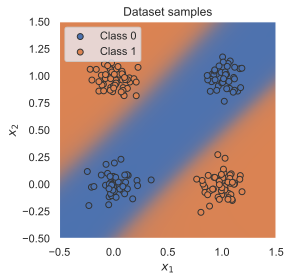

In [111]:
@torch.no_grad() # Decorator, same effect as "with torch.no_grad(): ..." over the whole function.
def visualize_classification(model, data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]
    
    fig = plt.figure(figsize=(4,4), dpi=500)
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()
    
    # Let's make use of a lot of operations we have learned above
    model.to(device)
    c0 = torch.Tensor(to_rgba("C0")).to(device)
    c1 = torch.Tensor(to_rgba("C1")).to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2, indexing='ij')  # Meshgrid function as in numpy
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    output_image = (1 - preds) * c0[None,None] + preds * c1[None,None]  # Specifying "None" in a dimension creates a new one
    output_image = output_image.cpu().numpy()  # Convert to numpy array. This only works for tensors on CPU, hence first push to CPU
    plt.imshow(output_image, origin='lower', extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)
    return fig

_ = visualize_classification(model, dataset.data, dataset.label)
plt.show()